<a href="https://colab.research.google.com/github/TummalaSharmila/MachineLearning_in_BI/blob/Assignment_2/assigment2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUC-ROC Score: 0.83
Thresholds: [inf 25. 19. 18. 17. 15. 14. 13. 12. 10.  8.  5.  4.  3.]
FPR: [0.  0.  0.  0.1 0.1 0.2 0.2 0.3 0.4 0.5 0.6 0.7 0.8 1. ]
TPR: [0.  0.1 0.4 0.5 0.6 0.6 0.7 0.8 0.8 0.9 0.9 1.  1.  1. ]


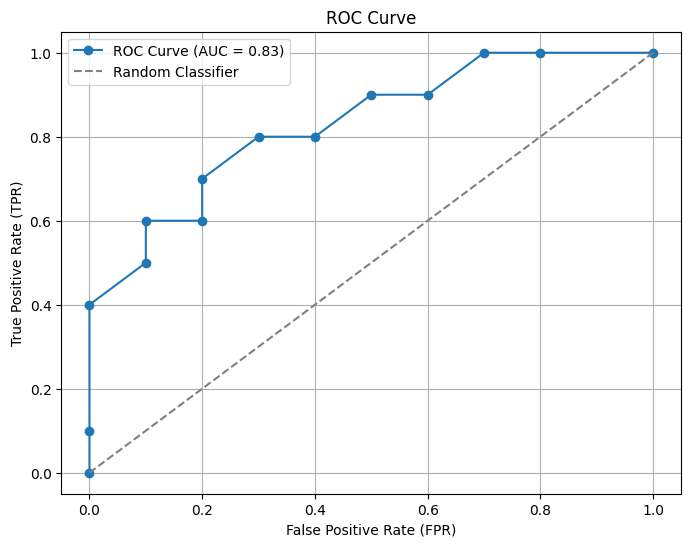

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#Question 1

# Defining scores and labels from your dataset
scores = np.array([25, 21, 20, 19, 18, 17, 14, 13, 10, 5, 18, 15, 13, 12, 10, 8, 5, 4, 3, 3])
labels = np.array([1] * 10 + [0] * 10)  # 1 for positive, 0 for negative

# Computing FPR, TPR, and threshold values
fpr, tpr, thresholds = roc_curve(labels, scores)

# Computing AUC-ROC score
auc_score = roc_auc_score(labels, scores)
print("AUC-ROC Score:", auc_score)

# Displaying FPR, TPR, and Thresholds
print("Thresholds:", thresholds)
print("FPR:", fpr)
print("TPR:", tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [1]:
#Question2
import numpy as np

# Given data
data = np.array([10, 13, 15, 20])

# Computing MLE estimate for theta (mean)
theta_mle = np.mean(data)

print("MLE Estimate for theta:", theta_mle)


MLE Estimate for theta: 14.5


Intercept: -4.244909363759932
Coefficient for age: 0.04180570538977576


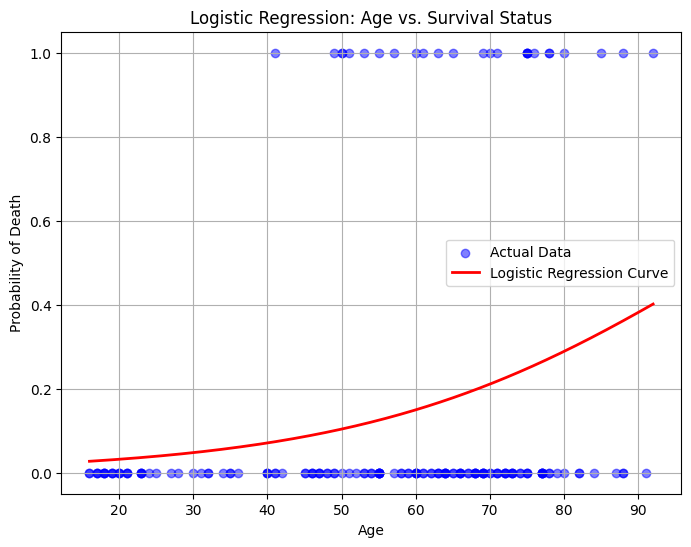

In [2]:
#Question3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Loading the dataset
file_path = "patient1.csv"
df = pd.read_csv(file_path, header=None, names=["status", "age"])

# Removing the header row to escape unnecessary errors
df = df.iloc[1:].reset_index(drop=True)

# Converting columns to appropriate data types
df["status"] = df["status"].astype(int)
df["age"] = df["age"].astype(float)

# Extracting features and target variable
X = df["age"].values.reshape(-1, 1)
y = df["status"].values

# Performing logistic regression
model = LogisticRegression()
model.fit(X, y)

# Retrieving the coefficients (weights)
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

# Displaying the final weights
print(f"Intercept: {intercept}")
print(f"Coefficient for age: {coefficient}")

# Generating data for plotting logistic function
age_range = np.linspace(min(X), max(X), 300).reshape(-1, 1)
probabilities = model.predict_proba(age_range)[:, 1]

# Ploting the logistic function
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label="Actual Data", alpha=0.5)
plt.plot(age_range, probabilities, color='red', linewidth=2, label="Logistic Regression Curve")
plt.xlabel("Age")
plt.ylabel("Probability of Death")
plt.title("Logistic Regression: Age vs. Survival Status")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Loading the dataset
file_path = "Immunotherapy.xlsx"  # Ensure the file is in the correct directory
xls = pd.ExcelFile(file_path)

# Reading training and test datasets
train_df = pd.read_excel(xls, sheet_name="Training data set")
test_df = pd.read_excel(xls, sheet_name="Test data set")

# Separating features and target variable
X_train = train_df.iloc[:, :-1].values  # All columns except the last (features)
y_train = train_df.iloc[:, -1].values   # Last column as target (treatment result)

X_test = test_df.iloc[:, :-1].values  # Test set features

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit Input layer
    Dense(16, activation='tanh'),  # First hidden layer
    Dense(8, activation='tanh'),   # Second hidden layer
    Dense(1, activation='sigmoid') # Output layer (sigmoid for binary classification)
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# Making predictions on the test se


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4473 - loss: 0.7576
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4031 - loss: 0.6962
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3792 - loss: 0.6642  
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3862 - loss: 0.7722 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4571 - loss: 0.6204
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3802 - loss: 0.6206
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4572 - loss: 0.6971
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4524 - loss: 0.6681
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4843 - loss: 0.6054  
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4589 - loss: 0.6027 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5301 - loss: 0.5922 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy